In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
print(plt.style.available)
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('darkgrid')
from matplotlib.dates import DateFormatter
import datetime as dt
from statsmodels.tsa.stattools import adfuller
import plotly.offline as pyoff
import plotly.graph_objs as go

# Check if 'seaborn-darkgrid' is available, otherwise use 'ggplot'
import matplotlib
available_styles = plt.style.available
if 'seaborn-darkgrid' in available_styles:
    matplotlib.style.use('seaborn-darkgrid')
else:
    matplotlib.style.use('ggplot')

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


#Importing complete wind and solar energy  data for 2015- 2021 Germany

In [2]:
df = pd.read_csv("time_series_60min_singleindex_filtered.csv", parse_dates=[0], index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50401 entries, 2014-12-31 23:00:00+00:00 to 2020-09-30 23:00:00+00:00
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   cet_cest_timestamp                    50401 non-null  object 
 1   DE_load_actual_entsoe_transparency    50400 non-null  float64
 2   DE_load_forecast_entsoe_transparency  50376 non-null  float64
 3   DE_solar_capacity                     43800 non-null  float64
 4   DE_solar_generation_actual            50297 non-null  float64
 5   DE_solar_profile                      43696 non-null  float64
 6   DE_wind_capacity                      43800 non-null  float64
 7   DE_wind_generation_actual             50326 non-null  float64
 8   DE_wind_profile                       43725 non-null  float64
 9   DE_wind_offshore_capacity             43800 non-null  float64
 10  DE_wind_offshore_generation_actual 

In [4]:
#display rows which have null values in "wind generation actual"
df[df['DE_wind_generation_actual'].isna()]

,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
utc_timestamp,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,2015-01-01T00:00:00+0100,NaN,NaN,37248.0,NaN,NaN,27913.0,NaN,NaN,667.0,NaN,NaN,27246.0,NaN,NaN
2016-05-31 21:00:00+00:00,2016-05-31T23:00:00+0200,49286.0,47884.0,38989.0,NaN,NaN,34217.0,NaN,NaN,2275.0,NaN,NaN,31942.0,NaN,NaN
2016-05-31 22:00:00+00:00,2016-06-01T00:00:00+0200,45570.0,44767.0,38991.0,NaN,NaN,34238.0,NaN,NaN,2275.0,NaN,NaN,31963.0,NaN,NaN
2016-05-31 23:00:00+00:00,2016-06-01T01:00:00+0200,43906.0,42865.0,38991.0,NaN,NaN,34238.0,NaN,NaN,2275.0,NaN,NaN,31963.0,NaN,NaN
2016-06-01 00:00:00+00:00,2016-06-01T02:00:00+0200,43059.0,41763.0,38991.0,NaN,NaN,34238.0,NaN,NaN,2275.0,NaN,NaN,31963.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-09 18:00:00+00:00,2016-12-09T19:00:00+0100,67805.0,68936.0,39699.0,NaN,NaN,36538.0,NaN,NaN,2558.0,NaN,NaN,33980.0,NaN,NaN
2016-12-09 19:00:00+00:00,2016-12-09T20:00:00+0100,63626.0,65169.0,39699.0,NaN,NaN,36538.0,NaN,NaN,2558.0,NaN,NaN,33980.0,NaN,NaN
2016-12-09 20:00:00+00:00,2016-12-09T21:00:00+0100,59988.0,61899.0,39699.0,NaN,NaN,36538.0,NaN,NaN,2558.0,NaN,NaN,33980.0,NaN,NaN


In [5]:
df[df['DE_solar_generation_actual'].isna()]  #display rows which have null values in "solar generation actual"

,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
utc_timestamp,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,2015-01-01T00:00:00+0100,NaN,NaN,37248.0,NaN,NaN,27913.0,NaN,NaN,667.0,NaN,NaN,27246.0,NaN,NaN
2015-01-01 00:00:00+00:00,2015-01-01T01:00:00+0100,41151.0,39723.0,37248.0,NaN,NaN,27913.0,8852.0,0.3171,667.0,517.0,0.7744,27246.0,8336.0,0.3059
2015-01-01 01:00:00+00:00,2015-01-01T02:00:00+0100,40135.0,38813.0,37248.0,NaN,NaN,27913.0,9054.0,0.3244,667.0,514.0,0.7710,27246.0,8540.0,0.3134
2015-01-01 02:00:00+00:00,2015-01-01T03:00:00+0100,39106.0,38490.0,37248.0,NaN,NaN,27913.0,9070.0,0.3249,667.0,518.0,0.7761,27246.0,8552.0,0.3139
2015-01-01 03:00:00+00:00,2015-01-01T04:00:00+0100,38765.0,38644.0,37248.0,NaN,NaN,27913.0,9163.0,0.3283,667.0,520.0,0.7793,27246.0,8643.0,0.3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-09 18:00:00+00:00,2016-12-09T19:00:00+0100,67805.0,68936.0,39699.0,NaN,NaN,36538.0,NaN,NaN,2558.0,NaN,NaN,33980.0,NaN,NaN
2016-12-09 19:00:00+00:00,2016-12-09T20:00:00+0100,63626.0,65169.0,39699.0,NaN,NaN,36538.0,NaN,NaN,2558.0,NaN,NaN,33980.0,NaN,NaN
2016-12-09 20:00:00+00:00,2016-12-09T21:00:00+0100,59988.0,61899.0,39699.0,NaN,NaN,36538.0,NaN,NaN,2558.0,NaN,NaN,33980.0,NaN,NaN


In [6]:
df.isna().sum()   #75 null values for wind_gen_actual #104 null values for solar_gen_actual 

cet_cest_timestamp                         0
DE_load_actual_entsoe_transparency         1
DE_load_forecast_entsoe_transparency      25
DE_solar_capacity                       6601
DE_solar_generation_actual               104
DE_solar_profile                        6705
DE_wind_capacity                        6601
DE_wind_generation_actual                 75
DE_wind_profile                         6676
DE_wind_offshore_capacity               6601
DE_wind_offshore_generation_actual        75
DE_wind_offshore_profile                6676
DE_wind_onshore_capacity                6601
DE_wind_onshore_generation_actual         73
DE_wind_onshore_profile                 6674
dtype: int64

####Filling null values from the values of the day before 

In [7]:
nulls = df.isna().any(axis=1)
df.loc[nulls, ['DE_solar_generation_actual','cet_cest_timestamp']] = df.shift(24).loc[nulls, ['DE_solar_generation_actual','cet_cest_timestamp']]

#shift function to shift the index 24 hours

####Rechecking the null values (whatever left)

In [8]:
df[df['DE_solar_generation_actual'].isna()]

,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
utc_timestamp,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,None,NaN,NaN,37248.0,NaN,NaN,27913.0,NaN,NaN,667.0,NaN,NaN,27246.0,NaN,NaN
2015-01-01 00:00:00+00:00,None,41151.0,39723.0,37248.0,NaN,NaN,27913.0,8852.0,0.3171,667.0,517.0,0.7744,27246.0,8336.0,0.3059
2015-01-01 01:00:00+00:00,None,40135.0,38813.0,37248.0,NaN,NaN,27913.0,9054.0,0.3244,667.0,514.0,0.7710,27246.0,8540.0,0.3134
2015-01-01 02:00:00+00:00,None,39106.0,38490.0,37248.0,NaN,NaN,27913.0,9070.0,0.3249,667.0,518.0,0.7761,27246.0,8552.0,0.3139
2015-01-01 03:00:00+00:00,None,38765.0,38644.0,37248.0,NaN,NaN,27913.0,9163.0,0.3283,667.0,520.0,0.7793,27246.0,8643.0,0.3172
2015-01-01 04:00:00+00:00,None,38941.0,38773.0,37248.0,NaN,NaN,27913.0,9231.0,0.3307,667.0,520.0,0.7790,27246.0,8712.0,0.3197
2015-01-01 05:00:00+00:00,None,39045.0,37247.0,37248.0,NaN,NaN,27913.0,9689.0,0.3471,667.0,521.0,0.7815,27246.0,9167.0,0.3365
2015-01-01 06:00:00+00:00,None,40206.0,40371.0,37248.0,NaN,NaN,27913.0,10331.0,0.3701,667.0,520.0,0.7801,27246.0,9811.0,0.3601


Observation --> The only remaining null values left are the ones that were from the first day because we filled in the rest of the null values from the day before.

In [9]:
#fill in the rest to zero because that is what they would be at those hours of night till 6 am
df['DE_solar_generation_actual'].fillna(0, inplace = True)
df['cet_cest_timestamp'].fillna(0, inplace = True) 

####Repeating the same for wind energy

In [10]:
nulls =df.isna().any(axis=1)
df.loc[nulls, ['DE_wind_generation_actual','cet_cest_timestamp']] = df.shift(24).loc[nulls, ['DE_wind_generation_actual','cet_cest_timestamp']]



####Replacing the null values (whatever left) by mean



In [11]:
df[df['DE_wind_generation_actual'].isna()]

,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
utc_timestamp,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,None,NaN,NaN,37248.0,0.0,NaN,27913.0,NaN,NaN,667.0,NaN,NaN,27246.0,NaN,NaN
2015-01-01 00:00:00+00:00,None,41151.0,39723.0,37248.0,0.0,NaN,27913.0,NaN,0.3171,667.0,517.0,0.7744,27246.0,8336.0,0.3059
2015-01-01 01:00:00+00:00,None,40135.0,38813.0,37248.0,0.0,NaN,27913.0,NaN,0.3244,667.0,514.0,0.7710,27246.0,8540.0,0.3134
2015-01-01 02:00:00+00:00,None,39106.0,38490.0,37248.0,0.0,NaN,27913.0,NaN,0.3249,667.0,518.0,0.7761,27246.0,8552.0,0.3139
2015-01-01 03:00:00+00:00,None,38765.0,38644.0,37248.0,0.0,NaN,27913.0,NaN,0.3283,667.0,520.0,0.7793,27246.0,8643.0,0.3172
2015-01-01 04:00:00+00:00,None,38941.0,38773.0,37248.0,0.0,NaN,27913.0,NaN,0.3307,667.0,520.0,0.7790,27246.0,8712.0,0.3197
2015-01-01 05:00:00+00:00,None,39045.0,37247.0,37248.0,0.0,NaN,27913.0,NaN,0.3471,667.0,521.0,0.7815,27246.0,9167.0,0.3365
2015-01-01 06:00:00+00:00,None,40206.0,40371.0,37248.0,0.0,NaN,27913.0,NaN,0.3701,667.0,520.0,0.7801,27246.0,9811.0,0.3601


In [12]:
df['DE_wind_generation_actual'].mean()

11556.499335225131

In [13]:
df['DE_wind_generation_actual'].fillna(11556, inplace=True)

In [14]:
df.isna().sum()

cet_cest_timestamp                         8
DE_load_actual_entsoe_transparency         1
DE_load_forecast_entsoe_transparency      25
DE_solar_capacity                       6601
DE_solar_generation_actual                 0
DE_solar_profile                        6705
DE_wind_capacity                        6601
DE_wind_generation_actual                  0
DE_wind_profile                         6676
DE_wind_offshore_capacity               6601
DE_wind_offshore_generation_actual        75
DE_wind_offshore_profile                6676
DE_wind_onshore_capacity                6601
DE_wind_onshore_generation_actual         73
DE_wind_onshore_profile                 6674
dtype: int64

#HEAT MAP TO CHECK CORRELATIONS BETWEEN FEATURES

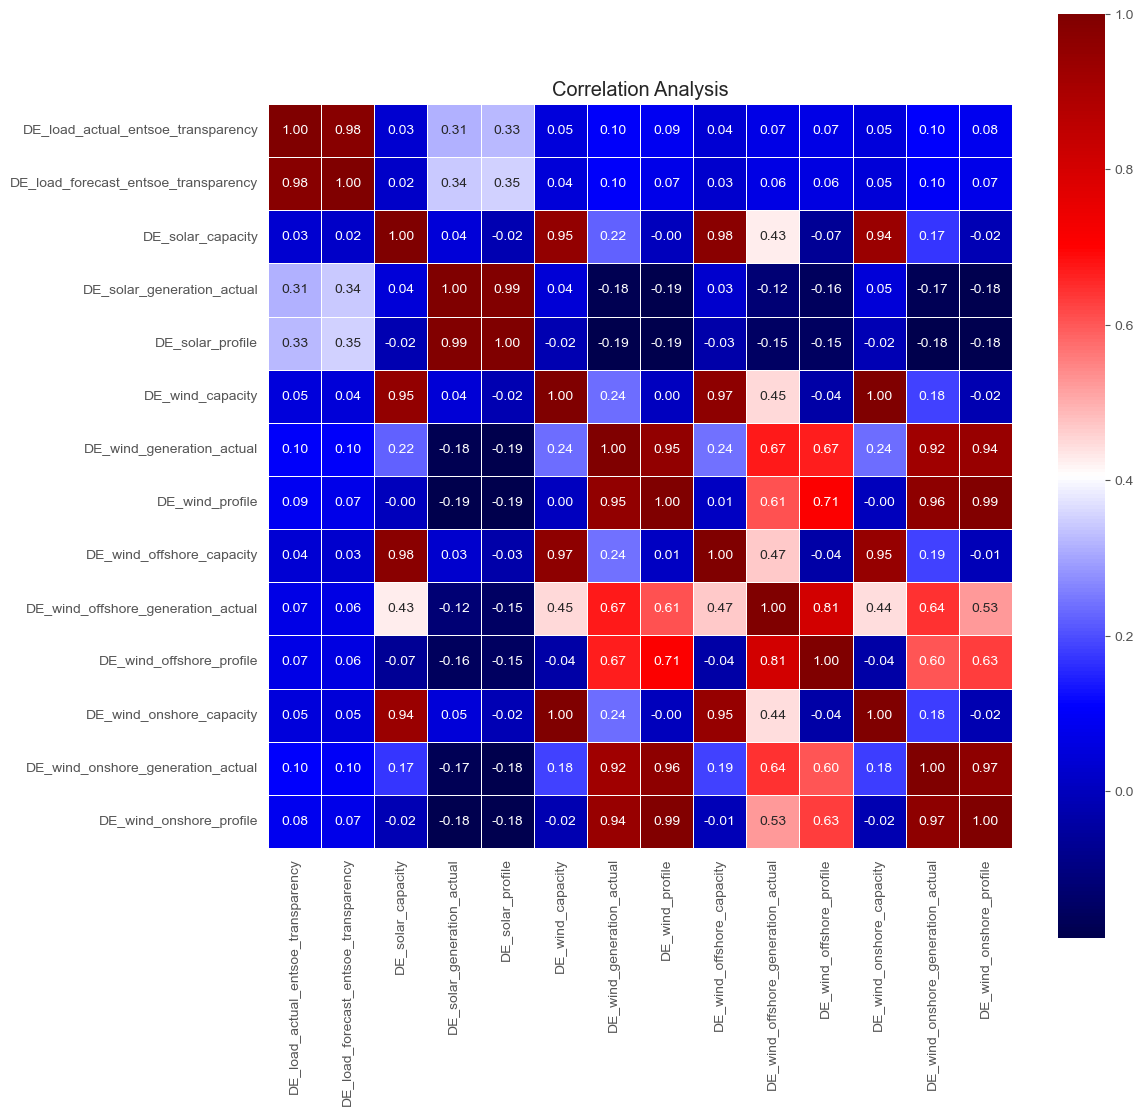

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Create the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
sns.heatmap(data=numeric_df.corr(),
            annot=True,
            annot_kws={"size": 10},
            square=True,
            cmap='seismic',
            fmt='.2f',
            linewidths=0.5,
            linecolor='w',
            ax=ax)
plt.title('Correlation Analysis')
plt.show()


solar_generation_actual depends most on solar_profile

wind_generation-actual depends most on wind_profile, wind_onshore_profile, wind_onshore_generation and  then on wind_offshore_profile and wind_offshore_generation 

#dataset with timestamps as features (used later for time series forecasting models)

In [16]:
modified=df[['cet_cest_timestamp', 'DE_solar_generation_actual','DE_wind_generation_actual']]
modified

,cet_cest_timestamp,DE_solar_generation_actual,DE_wind_generation_actual
utc_timestamp,,,
2014-12-31 23:00:00+00:00,None,0.0,11556.0
2015-01-01 00:00:00+00:00,None,0.0,11556.0
2015-01-01 01:00:00+00:00,None,0.0,11556.0
2015-01-01 02:00:00+00:00,None,0.0,11556.0
2015-01-01 03:00:00+00:00,None,0.0,11556.0
...,...,...,...
2020-09-30 19:00:00+00:00,2020-09-28T21:00:00+0200,0.0,2516.0
2020-09-30 20:00:00+00:00,2020-09-28T22:00:00+0200,0.0,2180.0
2020-09-30 21:00:00+00:00,2020-09-28T23:00:00+0200,0.0,1834.0


In [17]:
#modified dataset
# energy_all = pd.read_csv("time_series_60min_singleindex_filtered (3).csv",
#                         parse_dates=[0], index_col=0)

The only remaining null values left are the ones that were from the first day because we filled in the rest of the null values from the day before. We see that it that it also turned the dummy column, cet_cest_timestamp, into nulls at the same location. This is why I used it as dummy column.

In [18]:
# Drop the column becasue we do not need another time column
modified.drop(columns='cet_cest_timestamp',inplace=True)

# EDA

##Histograms for solar_generation_actual and wind_generation_actual 

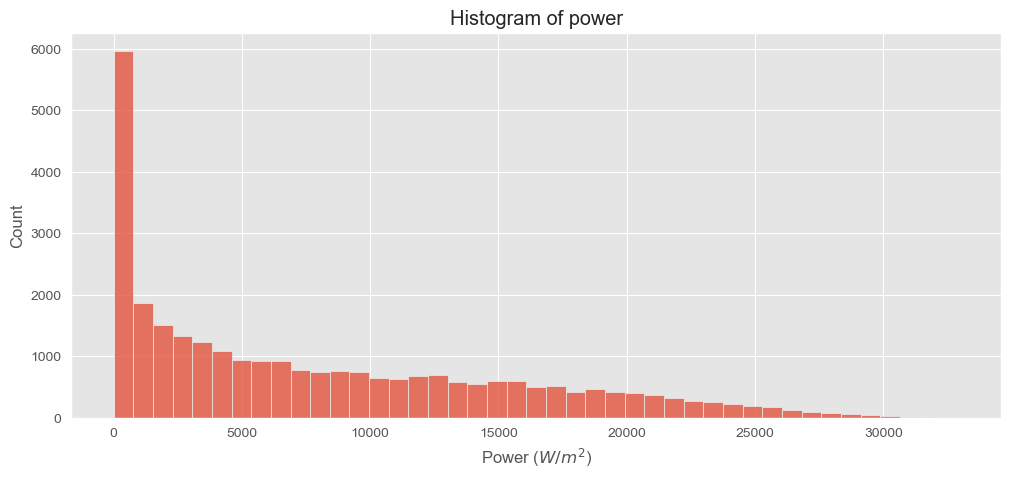

In [19]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['DE_solar_generation_actual'] != 0].DE_solar_generation_actual)  # remove all 0 in histogram
plt.title('Histogram of power')
plt.xlabel('Power ($W/m^2$)')
plt.show()

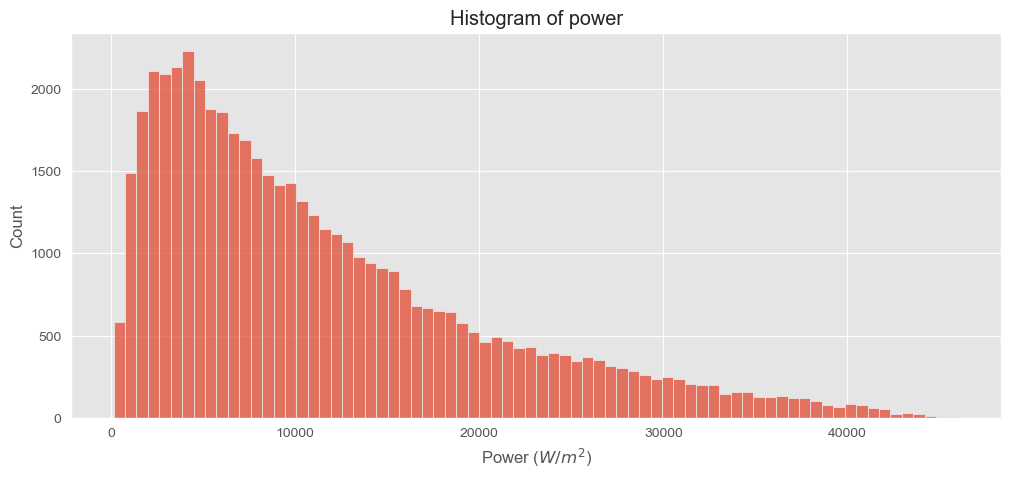

In [20]:
plt.figure(figsize=(12, 5))
sns.histplot(df[df['DE_wind_generation_actual'] != 0].DE_wind_generation_actual)  # remove all 0 in histogram
plt.title('Histogram of power')
plt.xlabel('Power ($W/m^2$)')
plt.show()

In [21]:
# We will create a new data frame so that we can make the appropriate boxplots. 
DE_energy = modified.reset_index()
DE_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50401 entries, 0 to 50400
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   utc_timestamp               50401 non-null  datetime64[ns, UTC]
 1   DE_solar_generation_actual  50401 non-null  float64            
 2   DE_wind_generation_actual   50401 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2)
memory usage: 1.2 MB


In [22]:
# create utc_timestamp as a column and another hour column
DE_energy['utc_timestamp'] = pd.to_datetime(DE_energy['utc_timestamp']).apply(lambda x: dt.datetime.strftime(x,'%Y-%m-%d %H:%M:%S'))

DE_energy['utc_timestamp']=pd.to_datetime(DE_energy['utc_timestamp'])
DE_energy['hour'] = DE_energy['utc_timestamp'].dt.hour

## boxplot of energy output vs the hour at which recorded (useful for time series forecast)

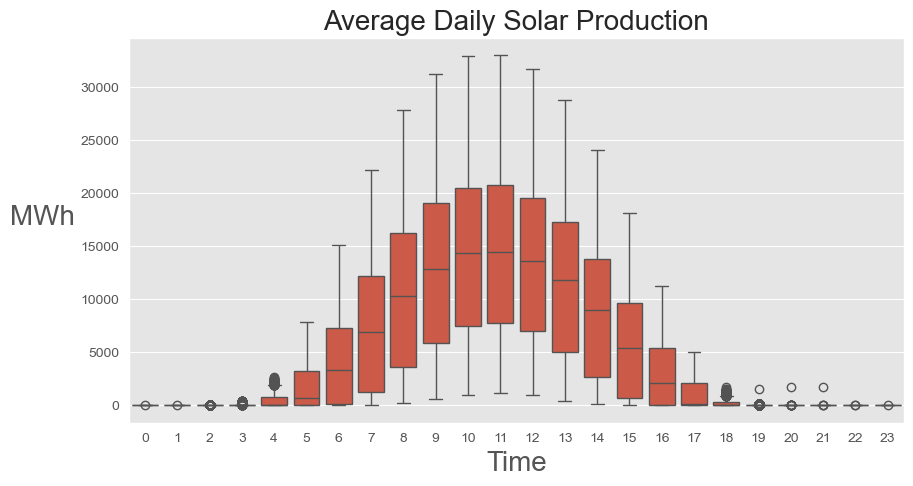

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot of the average solar generation production
plt.figure(figsize=(10, 5))
sns.boxplot(x='hour', y='DE_solar_generation_actual', data=DE_energy)

plt.title('Average Daily Solar Production', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel("MWh", rotation=0, ha='right', fontsize=20)
plt.show()


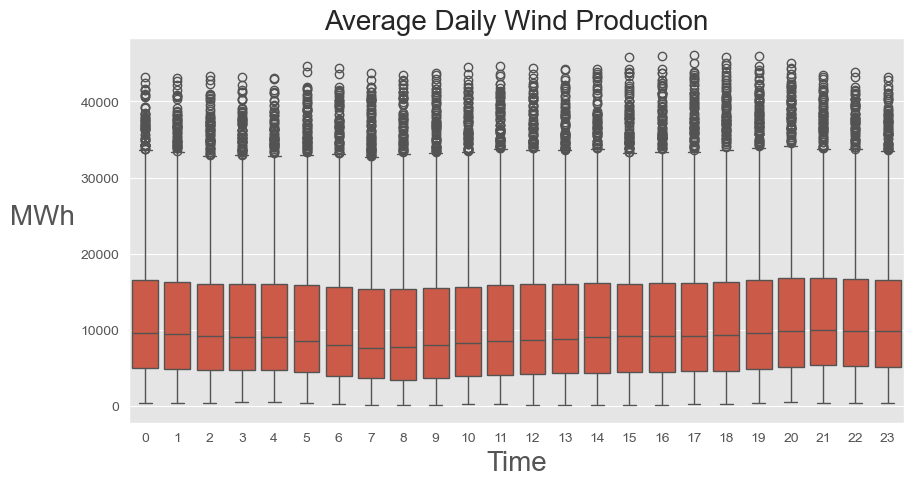

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot of the average wind generation production
plt.figure(figsize=(10, 5))
sns.boxplot(x='hour', y='DE_wind_generation_actual', data=DE_energy)

plt.title('Average Daily Wind Production', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel("MWh", rotation=0, ha='right', fontsize=20)
plt.show()


Wind appears to not differ as much during the day as solar.The time of day does affect wind speed with surface temperatures increasing, however it is not shown in this plot.

We can use mean over all the days to get a better time series analysis with less noise.

In [25]:
# use the resample function to average the generation over all the days
modified = modified.resample('D').mean()
modified

,DE_solar_generation_actual,DE_wind_generation_actual
utc_timestamp,,
2014-12-31 00:00:00+00:00,0.000000,11556.000000
2015-01-01 00:00:00+00:00,712.416667,14194.458333
2015-01-02 00:00:00+00:00,323.208333,25148.083333
2015-01-03 00:00:00+00:00,301.541667,19289.791667
2015-01-04 00:00:00+00:00,832.583333,16042.625000
...,...,...
2020-09-26 00:00:00+00:00,2713.125000,13015.041667
2020-09-27 00:00:00+00:00,1527.083333,16333.916667
2020-09-28 00:00:00+00:00,4035.666667,7771.750000


In [26]:
modified.shape

(2101, 2)

#time series plot for energy averged over all days

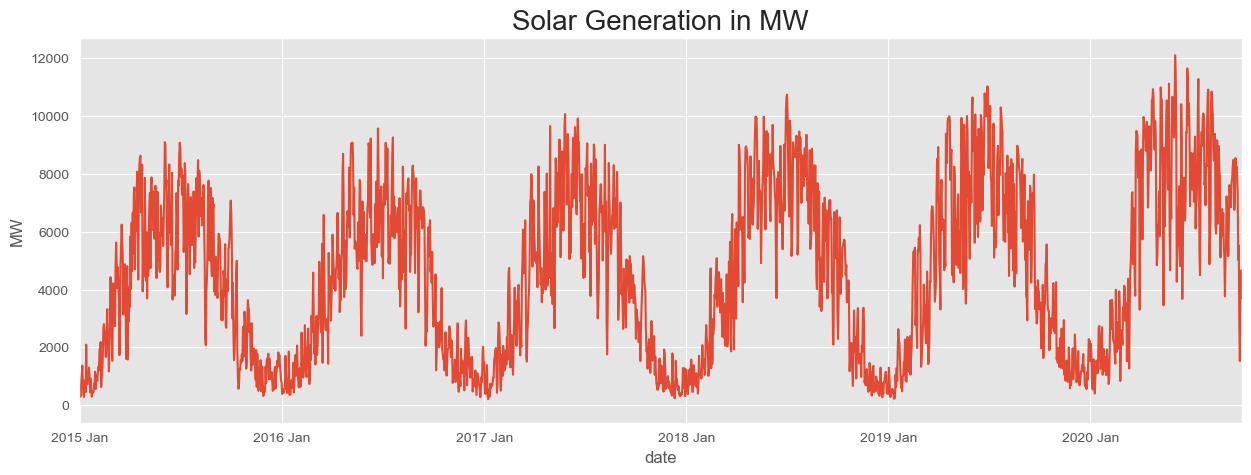

In [27]:
# visualize the time time series of solar 
plt.figure(figsize=(15,5))
plt.plot(modified['DE_solar_generation_actual'])
plt.title('Solar Generation in MW', fontsize=20)
plt.ylabel('MW')
plt.xlabel('date')
ax = plt.gca()

ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y %b"))
plt.show()

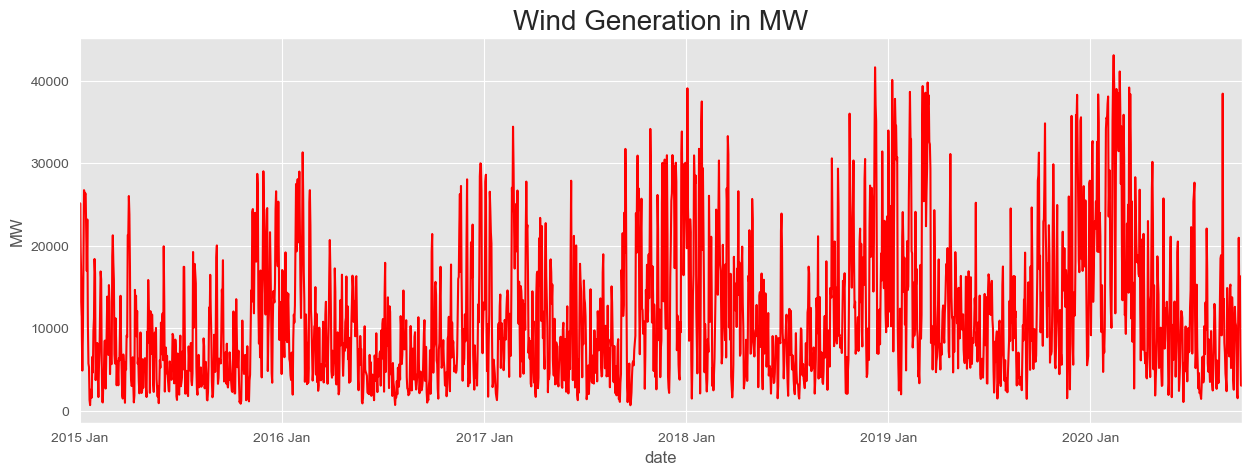

In [28]:
# Do the same thing for the wind data
plt.figure(figsize=(15,5))
plt.plot(modified['DE_wind_generation_actual'], c='red')
plt.title('Wind Generation in MW', fontsize=20)
plt.ylabel('MW')
plt.xlabel('date')
ax = plt.gca()

ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y %b"))
plt.show()

In [29]:
# Lets check out some basic statistics for the data
modified.describe()

,DE_solar_generation_actual,DE_wind_generation_actual
count,2101.000000,2101.000000
mean,4557.518582,11556.499028
std,2903.978814,8410.922186
min,0.000000,686.750000
25%,1763.458333,5182.708333
50%,4484.958333,9116.208333
75%,6916.333333,15759.125000
max,12101.208333,43086.875000


The mean is much higher for wind and that is because wind produces much more electricity than solar in Germany. They both have very high standard deviations.

#MACHINE LEARNING ALOGORITHMS 

##Train-Test-Split

In [30]:
df.head()

,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
utc_timestamp,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,None,NaN,NaN,37248.0,0.0,NaN,27913.0,11556.0,NaN,667.0,NaN,NaN,27246.0,NaN,NaN
2015-01-01 00:00:00+00:00,None,41151.0,39723.0,37248.0,0.0,NaN,27913.0,11556.0,0.3171,667.0,517.0,0.7744,27246.0,8336.0,0.3059
2015-01-01 01:00:00+00:00,None,40135.0,38813.0,37248.0,0.0,NaN,27913.0,11556.0,0.3244,667.0,514.0,0.7710,27246.0,8540.0,0.3134
2015-01-01 02:00:00+00:00,None,39106.0,38490.0,37248.0,0.0,NaN,27913.0,11556.0,0.3249,667.0,518.0,0.7761,27246.0,8552.0,0.3139
2015-01-01 03:00:00+00:00,None,38765.0,38644.0,37248.0,0.0,NaN,27913.0,11556.0,0.3283,667.0,520.0,0.7793,27246.0,8643.0,0.3172


In [31]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [32]:
df.fillna(0, inplace=True)

In [33]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(df['DE_solar_profile'], df['DE_solar_generation_actual'],test_size = 0.2, random_state = None)

In [34]:
X1_train=np.array(X1_train).reshape(-1,1)
X1_test=np.array(X1_test).reshape(-1,1)

In [35]:
X1_train

array([[0.    ],
       [0.1328],
       [0.0032],
       ...,
       [0.1954],
       [0.    ],
       [0.    ]])

In [36]:
X2_train, X2_test, y2_train, y2_test = train_test_split(df['DE_wind_profile'], df['DE_wind_generation_actual'],test_size = 0.2, random_state = None)

In [37]:
# For Wind Energy
X2_train=np.array(X2_train).reshape(-1,1)
X2_test=np.array(X2_test).reshape(-1,1)

In [38]:
X2_train

array([[0.0651],
       [0.2   ],
       [0.5208],
       ...,
       [0.    ],
       [0.1649],
       [0.7004]])

##Lasso Regression

In [39]:
df.head()

,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
utc_timestamp,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,0,0.0,0.0,37248.0,0.0,0.0,27913.0,11556.0,0.0000,667.0,0.0,0.0000,27246.0,0.0,0.0000
2015-01-01 00:00:00+00:00,0,41151.0,39723.0,37248.0,0.0,0.0,27913.0,11556.0,0.3171,667.0,517.0,0.7744,27246.0,8336.0,0.3059
2015-01-01 01:00:00+00:00,0,40135.0,38813.0,37248.0,0.0,0.0,27913.0,11556.0,0.3244,667.0,514.0,0.7710,27246.0,8540.0,0.3134
2015-01-01 02:00:00+00:00,0,39106.0,38490.0,37248.0,0.0,0.0,27913.0,11556.0,0.3249,667.0,518.0,0.7761,27246.0,8552.0,0.3139
2015-01-01 03:00:00+00:00,0,38765.0,38644.0,37248.0,0.0,0.0,27913.0,11556.0,0.3283,667.0,520.0,0.7793,27246.0,8643.0,0.3172


In [40]:
from sklearn.linear_model import Lasso
 
# Train the model
# Solar Energy
lasso = Lasso(alpha = 1)
lasso.fit(X1_train, y1_train)
y1_pred = lasso.predict(X1_test)

In [41]:
from sklearn.linear_model import Lasso
import numpy as np

# Ensure X2_train and X2_test are in the correct shape
X2_train = X2_train.values.reshape(-1, 1) if X2_train.ndim == 1 else X2_train
X2_test = X2_test.values.reshape(-1, 1) if X2_test.ndim == 1 else X2_test

# Wind energy
lasso = Lasso(alpha=1)
lasso.fit(X2_train, y2_train)
y2_pred = lasso.predict(X2_test)


In [42]:
#Hyperparameter tuning - alpha = 2
lasso = Lasso(alpha = 2)
lasso.fit(X1_train, y1_train)
y1_pred2 = lasso.predict(X1_test)

In [43]:
lasso = Lasso(alpha = 2)
lasso.fit(X2_train, y2_train)
y2_pred2 = lasso.predict(X2_test)

###Evaluation Metrics

####Mean Squared Error

In [44]:
#alpha = 1
from sklearn.metrics import mean_squared_error
print("Solar MSE = ",mean_squared_error(y1_test,y1_pred))

Solar MSE =  14583216.528979594


In [45]:
print("Wind MSE = ",mean_squared_error(y2_test,y2_pred))

Wind MSE =  39885717.21357625


In [46]:
#alpha = 2
print("Solar MSE = ",mean_squared_error(y1_test,y1_pred2))

Solar MSE =  14583113.025383828


In [47]:
print("Wind MSE = ",mean_squared_error(y2_test,y2_pred2))

Wind MSE =  39886270.091377676


####Mean Absolute Error

In [48]:
from sklearn.metrics import mean_absolute_error
print("Solar MAE = ",mean_absolute_error(y1_test,y1_pred))

Solar MAE =  1784.7751913781262


In [49]:
print("Wind MAE = ",mean_absolute_error(y2_test,y2_pred))

Wind MAE =  4108.439584553506


In [50]:
#alpha = 2
print("Solar MAE = ",mean_absolute_error(y1_test,y1_pred2))

Solar MAE =  1786.3500246757899


In [51]:
print("Wind MAE = ",mean_absolute_error(y2_test,y2_pred2))

Wind MAE =  4109.476721327585


####Root Mean Squared Error

In [52]:
print("Solar RMSE = ",np.sqrt(mean_squared_error(y1_test,y1_pred)))

Solar RMSE =  3818.7977858194577


In [53]:
print("Wind RMSE = ",np.sqrt(mean_squared_error(y2_test,y2_pred)))

Wind RMSE =  6315.51401024305


In [54]:
#alpha = 2
print("Solar RMSE = ",np.sqrt(mean_squared_error(y1_test,y1_pred2)))

Solar RMSE =  3818.7842339393605


In [55]:
print("Wind RMSE = ",np.sqrt(mean_squared_error(y2_test,y2_pred)))

Wind RMSE =  6315.51401024305


####R Squared

In [56]:
from sklearn.metrics import r2_score
r2_solar = r2_score(y1_test,y1_pred)
print("Solar R2 = ",r2_solar)

Solar R2 =  0.6951063846953827


In [57]:
r2_wind = r2_score(y2_test,y2_pred)
print("Wind R2 = ",r2_wind)

Wind R2 =  0.5158917909255495


In [58]:
#alpha = 2
r2_solar = r2_score(y1_test,y1_pred2)
print("Solar R2 = ",r2_solar)

Solar R2 =  0.6951085486614355


In [59]:
r2_wind = r2_score(y2_test,y2_pred2)
print("Wind R2 = ",r2_wind)

Wind R2 =  0.5158850804361568


###Plot

In [60]:
g=plt.plot(y1_test - y1_pred,marker='o',linestyle='')

#RIDGE REGRESSION

In [61]:
from sklearn.linear_model import Ridge
 
# Train the model
ridgeSolar = Ridge(alpha = 1)
ridgeSolar.fit(X1_train, y1_train)
y1_pred = ridgeSolar.predict(X1_test)

In [62]:
ridgeWind = Ridge(alpha = 1)
ridgeWind.fit(X2_train, y2_train)
y2_pred = ridgeSolar.predict(X2_test)

In [63]:
#Hyperparameter tuning - alpha = 2
ridgeSolar = Ridge(alpha = 2)
ridgeSolar.fit(X1_train, y1_train)
y1_pred2 = ridgeSolar.predict(X1_test)

In [64]:
ridgeWind = Ridge(alpha = 2)
ridgeWind.fit(X2_train, y2_train)
y2_pred2 = ridgeSolar.predict(X2_test)

##Evaluation Metrics

###Mean Squared Error

In [65]:
from sklearn.metrics import mean_squared_error
print("Solar MSE = ",mean_squared_error(y1_test,y1_pred))

Solar MSE =  14583222.169995334


In [66]:
print("Wind MSE = ",mean_squared_error(y2_test,y2_pred))

Wind MSE =  44698787.06267924


In [67]:
#alpha = 2
print("Solar MSE = ",mean_squared_error(y1_test,y1_pred2))

Solar MSE =  14583117.829616018


In [68]:
print("Wind MSE = ",mean_squared_error(y2_test,y2_pred2))

Wind MSE =  44676619.21593904


###Mean Absolute Error

In [69]:
from sklearn.metrics import mean_absolute_error
print("Solar MAE = ",mean_absolute_error(y1_test,y1_pred))

Solar MAE =  1784.7163509058507


In [70]:
print("Wind MAE = ",mean_absolute_error(y2_test,y2_pred))

Wind MAE =  3491.5333686641975


In [71]:
#alpha = 2
print("Solar MAE = ",mean_absolute_error(y1_test,y1_pred2))

Solar MAE =  1786.2272571708156


In [72]:
print("Wind MAE = ",mean_absolute_error(y2_test,y2_pred2))

Wind MAE =  3490.777945668095


###Root Mean Squared Error

In [73]:
print("Solar RMSE = ",np.sqrt(mean_squared_error(y1_test,y1_pred)))

Solar RMSE =  3818.7985244046763


In [74]:
print("Wind RMSE = ",np.sqrt(mean_squared_error(y2_test,y2_pred)))

Wind RMSE =  6685.715149681389


In [75]:
#alpha = 2
print("Solar RMSE = ",np.sqrt(mean_squared_error(y1_test,y1_pred2)))

Solar RMSE =  3818.7848629657074


In [76]:
print("Wind RMSE = ",np.sqrt(mean_squared_error(y2_test,y2_pred2)))

Wind RMSE =  6684.057092510434


###R Squared

In [77]:
from sklearn.metrics import r2_score
r2_solar = r2_score(y1_test,y1_pred)
print("Solar R2 = ",r2_solar)

Solar R2 =  0.6951062667577741


In [78]:
r2_wind = r2_score(y2_test,y2_pred)
print("Wind R2 = ",r2_wind)

Wind R2 =  0.4574737208098043


In [79]:
#alpha = 2
r2_solar = r2_score(y1_test,y1_pred2)
print("Solar R2 = ",r2_solar)

Solar R2 =  0.695108448218593


In [80]:
r2_wind = r2_score(y2_test,y2_pred2)
print("Wind R2 = ",r2_wind)

Wind R2 =  0.45774278044654026


###Plot

In [81]:
g=plt.plot(y1_test - y1_pred,marker='o',linestyle='')

#DECISION TREE

In [82]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X1_train, y1_train)

DecisionTreeRegressor(random_state=0)

In [83]:
y1_pred = regressor.predict(X1_test)
  
# print the predicted price
y1_test


utc_timestamp
2020-08-06 19:00:00+00:00        2.0
2017-06-13 23:00:00+00:00        0.0
2020-04-01 08:00:00+00:00    19348.0
2019-01-28 16:00:00+00:00       12.0
2015-06-12 09:00:00+00:00    21942.0
                              ...   
2018-06-20 04:00:00+00:00     1927.0
2017-05-23 02:00:00+00:00        0.0
2019-04-05 19:00:00+00:00        0.0
2015-10-17 13:00:00+00:00     2657.0
2018-01-29 05:00:00+00:00        0.0
Name: DE_solar_generation_actual, Length: 10081, dtype: float64

In [84]:
y1_pred

array([1599.46201045, 1599.46201045, 1599.46201045, ..., 1599.46201045,
       2767.75      , 1599.46201045])

In [85]:
#from sklearn.model_selection import cross_val_score 
#cross_val_score(regressor, X1_train, y1_train, cv=50)

In [86]:
#for wind energy
regressor.fit(X2_train, y2_train)

DecisionTreeRegressor(random_state=0)

In [87]:
y2_pred = regressor.predict(X2_test)
  
# print the predicted price
y2_test

utc_timestamp
2015-01-07 19:00:00+00:00    12803.0
2020-05-24 15:00:00+00:00    24294.0
2018-01-04 12:00:00+00:00    15530.0
2017-12-15 21:00:00+00:00     4973.0
2019-03-18 06:00:00+00:00    32736.0
                              ...   
2016-07-31 18:00:00+00:00     5358.0
2020-09-28 22:00:00+00:00     5807.0
2019-11-06 23:00:00+00:00     3056.0
2018-06-02 02:00:00+00:00     5802.0
2016-05-17 12:00:00+00:00    10256.0
Name: DE_wind_generation_actual, Length: 10081, dtype: float64

In [88]:
y2_pred

array([19522.66666667, 14252.36588566, 14225.        , ...,
        2367.66666667,  4696.1       , 11761.25      ])

In [89]:
#from sklearn.model_selection import cross_val_score 
#cross_val_score(regressor, X2_train, y2_train, cv=50)

In [90]:
from sklearn.metrics import r2_score

In [91]:
r2_score(y1_pred, y1_test)

0.5733082103546189

In [92]:
r2_score(y2_pred, y2_test)

0.6166333011860241

In [93]:
from sklearn.metrics import mean_absolute_error as mae

In [94]:
error = mae(y1_test, y1_pred)
print(error)

1817.1604219694198


In [95]:
error = mae(y2_test, y2_pred)
print(error)

2897.9799609248794


In [96]:
from sklearn.metrics import mean_squared_error
  
MSE = mean_squared_error(y1_test, y1_pred)
print(MSE)

14497237.872067755


In [97]:
from sklearn.metrics import mean_squared_error
  
MSE = mean_squared_error(y2_test, y2_pred)
print(MSE)

23990182.355935242


In [98]:
#root mean squared error for solar
print("RMSE",np.sqrt(mean_squared_error(y1_test,y1_pred)))

RMSE 3807.523850492306


In [99]:
#root mean squared error for wind
print("RMSE",np.sqrt(mean_squared_error(y2_test,y2_pred)))

RMSE 4897.9773739713455


Hyperparameter tuning with random state=1

In [100]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 1) 
  
# fit the regressor with X and Y data
regressor.fit(X1_train, y1_train)

DecisionTreeRegressor(random_state=1)

In [101]:
y1_pred2 = regressor.predict(X1_test)

In [102]:
#for wind energy
regressor.fit(X2_train, y2_train)

DecisionTreeRegressor(random_state=1)

In [103]:
y2_pred2 = regressor.predict(X2_test)

In [104]:
r2_score(y1_pred2, y1_test)

0.5733082103546189

In [105]:
r2_score(y2_pred2, y2_test)

0.6166333011860241

In [106]:
MSE = mean_squared_error(y1_test, y1_pred2)
print(MSE)

14497237.872067755


In [107]:
MSE = mean_squared_error(y2_test, y2_pred2)
print(MSE)

23990182.355935242


In [108]:
#root mean squared error for solar
print("RMSE",np.sqrt(mean_squared_error(y1_test,y1_pred2)))

RMSE 3807.523850492306


In [109]:
#root mean squared error for solar
print("RMSE",np.sqrt(mean_squared_error(y2_test,y2_pred2)))

RMSE 4897.9773739713455


In [110]:
error = mae(y1_test, y1_pred2)
print(error)

1817.1604219694198


In [111]:
error = mae(y2_test, y2_pred2)
print(error)

2897.9799609248794


In [112]:
g=plt.plot(y1_test - y1_pred,marker='o',linestyle='')

#SVM 


hyper parameters in SVR- decison boundary, kernel and hyperplane

The basic idea behind SVR is to find the best fit line.The best fit line is the hyperplane that has the maximum number of points.

Unlike other Regression models that try to minimize the error between the real and predicted value, the SVR tries to fit the best line within a threshold value. 

The threshold value is the distance between the hyperplane and boundary line. The fit time complexity of SVR is more than quadratic and hence hard to scale to datasets with more than a couple of 10000 samples.


For large datasets, Linear SVR or SGD Regressor is used

##solar energy

In [113]:
df

,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile
utc_timestamp,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,0,0.0,0.0,37248.0,0.0,0.0,27913.0,11556.0,0.0000,667.0,0.0,0.0000,27246.0,0.0,0.0000
2015-01-01 00:00:00+00:00,0,41151.0,39723.0,37248.0,0.0,0.0,27913.0,11556.0,0.3171,667.0,517.0,0.7744,27246.0,8336.0,0.3059
2015-01-01 01:00:00+00:00,0,40135.0,38813.0,37248.0,0.0,0.0,27913.0,11556.0,0.3244,667.0,514.0,0.7710,27246.0,8540.0,0.3134
2015-01-01 02:00:00+00:00,0,39106.0,38490.0,37248.0,0.0,0.0,27913.0,11556.0,0.3249,667.0,518.0,0.7761,27246.0,8552.0,0.3139
2015-01-01 03:00:00+00:00,0,38765.0,38644.0,37248.0,0.0,0.0,27913.0,11556.0,0.3283,667.0,520.0,0.7793,27246.0,8643.0,0.3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-30 19:00:00+00:00,2020-09-28T21:00:00+0200,57559.0,56708.0,0.0,0.0,0.0,0.0,2516.0,0.0000,0.0,4754.0,0.0000,0.0,5900.0,0.0000
2020-09-30 20:00:00+00:00,2020-09-28T22:00:00+0200,54108.0,53270.0,0.0,0.0,0.0,0.0,2180.0,0.0000,0.0,5194.0,0.0000,0.0,6642.0,0.0000
2020-09-30 21:00:00+00:00,2020-09-28T23:00:00+0200,49845.0,49239.0,0.0,0.0,0.0,0.0,1834.0,0.0000,0.0,5339.0,0.0000,0.0,6829.0,0.0000


In [114]:
df = df.dropna()
df_solar_x=df[['DE_load_actual_entsoe_transparency','DE_load_forecast_entsoe_transparency','DE_solar_profile']]
df_solar_y=df['DE_solar_generation_actual']
# df_solar_x.fillna(0)
# df_solar_x['DE_solar_profile'].fillna(0,inplace=True)
df = df.reset_index()



In [115]:
df = df.dropna()
df_solar_x=df[['utc_timestamp','DE_load_actual_entsoe_transparency','DE_load_forecast_entsoe_transparency','DE_solar_profile']]
df_solar_y=df['DE_solar_generation_actual']
# df_solar_x.fillna(0)
# df_solar_x['DE_solar_profile'].fillna(0,inplace=True)
df = df.reset_index()

In [116]:
# from sklearn.preprocessing import StandardScaler
# sc_x = StandardScaler()
# sc_y = StandardScaler()
# x = sc_x.fit_transform(df_solar_x)
# # y=df_solar_y.reshape(2, 1)
# # y = sc_y.fit_transform(y)

In [117]:
# df_solar_x = df_solar_x.dropna()
df_solar_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50401 entries, 0 to 50400
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype              
---  ------                                --------------  -----              
 0   utc_timestamp                         50401 non-null  datetime64[ns, UTC]
 1   DE_load_actual_entsoe_transparency    50401 non-null  float64            
 2   DE_load_forecast_entsoe_transparency  50401 non-null  float64            
 3   DE_solar_profile                      50401 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(3)
memory usage: 1.5 MB


In [118]:
from sklearn.model_selection import train_test_split
solar_x_train, solar_x_test,solar_y_train,solar_y_test = train_test_split(df_solar_x,df_solar_y,test_size = 0.2, random_state = None)
solar_x_train
#solar_y_train = solar_y_train.reshape(-1,1)
#solar_y_test = solar_y_test.reshape(-1,1)

,utc_timestamp,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_profile
6062,2015-09-10 13:00:00+00:00,62599.0,63213.0,0.3874
19950,2017-04-11 05:00:00+00:00,62290.0,61784.0,0.0413
1285,2015-02-23 12:00:00+00:00,70653.0,66758.0,0.0991
19998,2017-04-13 05:00:00+00:00,62259.0,59527.0,0.0290
26542,2018-01-10 21:00:00+00:00,59056.0,61141.0,0.0000
...,...,...,...,...
23002,2017-08-16 09:00:00+00:00,66660.0,64629.0,0.4112
37565,2019-04-15 04:00:00+00:00,57303.0,54387.0,0.0030
21026,2017-05-26 01:00:00+00:00,36656.0,38600.0,0.0000
11983,2016-05-14 06:00:00+00:00,50286.0,47720.0,0.1746


In [119]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

# Ensure that all features are numeric
def preprocess_features(df):
    for column in df.columns:
        if pd.api.types.is_datetime64_any_dtype(df[column]):
            df[column] = df[column].apply(lambda x: x.timestamp())
        elif pd.api.types.is_object_dtype(df[column]):
            df[column] = df[column].astype('category').cat.codes
    return df

# Fill missing values with zeros
solar_x_train = solar_x_train.fillna(0)
solar_x_test = solar_x_test.fillna(0)

# Preprocess training and test data
solar_x_train = preprocess_features(solar_x_train)
solar_x_test = preprocess_features(solar_x_test)

# Standardize the features
scaler = StandardScaler()
solar_x_train = scaler.fit_transform(solar_x_train)
solar_x_test = scaler.transform(solar_x_test)


In [120]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR

# Define a reduced parameter grid
param = {'C': [1, 10, 100], 
         'gamma': [0.1, 0.01, 0.001],
         'kernel': ['rbf'],
         'epsilon': [0.1, 0.01]} 

# Initialize the SVR model
modelsvr = SVR()

# Perform Randomized Search with Cross-Validation with reduced iterations and verbose output
random_search = RandomizedSearchCV(modelsvr, param, n_iter=20, n_jobs=-1, cv=3, verbose=3)
random_search.fit(solar_x_train, solar_y_train)

# Print the best parameters and the best estimator
print("Best Parameters after tuning:", random_search.best_params_)
print("Best Estimator after tuning:", random_search.best_estimator_)

# Make predictions with the best estimator
solar_y_pred = random_search.best_estimator_.predict(solar_x_test)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 2/3] END C=1, epsilon=0.1, gamma=0.1, kernel=rbf;, score=0.141 total time= 1.8min
[CV 3/3] END C=1, epsilon=0.1, gamma=0.1, kernel=rbf;, score=0.129 total time= 1.8min
[CV 1/3] END C=1, epsilon=0.1, gamma=0.1, kernel=rbf;, score=0.124 total time= 1.8min
[CV 1/3] END C=1, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-0.238 total time= 1.9min
[CV 2/3] END C=1, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-0.217 total time= 1.9min
[CV 3/3] END C=1, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-0.230 total time= 1.9min
[CV 2/3] END C=1, epsilon=0.1, gamma=0.001, kernel=rbf;, score=-0.371 total time= 2.0min
[CV 1/3] END C=1, epsilon=0.1, gamma=0.001, kernel=rbf;, score=-0.394 total time= 2.1min
[CV 1/3] END C=1, epsilon=0.01, gamma=0.1, kernel=rbf;, score=0.124 total time= 1.8min
[CV 2/3] END C=1, epsilon=0.01, gamma=0.1, kernel=rbf;, score=0.141 total time= 1.8min
[CV 3/3] END C=1, epsilon=0.01, gamma=0.1, kernel=rbf;, score=0.1

In [123]:
# Additional parameter grid for another search
parameters = {
    'C': np.logspace(-3, 3, 10),
    'gamma': np.logspace(-4, 0, 10),
    'kernel': ['rbf', 'linear']
}

# Perform another Randomized Search with Cross-Validation if needed
svr_rs = RandomizedSearchCV(SVR(epsilon=0.01), parameters, cv=3, scoring=scorer, verbose=3, n_jobs=-1, n_iter=100)
svr_rs.fit(solar_x_train, solar_y_train)


NameError: name 'scorer' is not defined

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(solar_y_test, solar_y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(solar_y_test, solar_y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(solar_y_test, solar_y_pred)))
print('R square score:', metrics.r2_score(solar_y_test, solar_y_pred))

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='sigmoid', C=1e3, gamma = 0.5, epsilon = 0.01)
regressor.fit(solar_x_train,solar_y_train)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='poly', C=1e3, gamma = 0.5, epsilon = 0.01)
regressor.fit(solar_x_train,solar_y_train)

In [ ]:
solar_y_pred = regressor.predict(solar_x_test)
solar_y_pred

#y_pred = y.inverse_transform(y_pred)

In [ ]:
from sklearn.metrics import r2_score
r2_score(solar_y_pred,solar_y_test)

In [ ]:
# plt.figure(1)
# plt.plot(solar_y_test, solar_y_pred, c = 'navy', label = 'Predicted')
# plt.legend()
# plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(solar_y_pred,solar_y_test)

using linear SVR (ideal for large datasets)

In [ ]:
from sklearn.svm import LinearSVR
lsvr = LinearSVR(verbose=0, dual=True)

# LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
#           intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
#           random_state=None, tol=0.0001, verbose=0)

#Then, we'll fit the model on train data and check the model accuracy score.

lsvr.fit(solar_x_train, solar_y_train)
y_pred = lsvr.predict(solar_x_test)
y_pred


In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(solar_y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(solar_y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(solar_y_test, y_pred)))
print('R square score:', metrics.r2_score(solar_y_test, y_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV
scorer = make_scorer(mean_squared_error, greater_is_better=False)
svr_gs = GridSearchCV(SVR(epsilon = 0.01), parameters, cv = K, scoring=scorer)

##wind energy 

In [ ]:
df.dropna()
df_wind_x=df[['DE_wind_capacity','DE_wind_profile','DE_wind_offshore_generation_actual','DE_wind_offshore_profile','DE_wind_onshore_generation_actual','DE_wind_onshore_profile']]
df_wind_y=df['DE_wind_generation_actual']

In [ ]:
from sklearn.model_selection import train_test_split
wind_x_train, wind_x_test,wind_y_train,wind_y_test = train_test_split(df_wind_x,df_wind_y,test_size = 0.2, random_state = None)

In [ ]:
from sklearn.svm import LinearSVR
lsvr = LinearSVR(verbose=0, dual=True)
# LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
#           intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
#           random_state=None, tol=0.0001, verbose=0)

#Then, we'll fit the model on train data and check the model accuracy score.

lsvr.fit(wind_x_train,wind_y_train)
y_pred = lsvr.predict(wind_x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_pred,wind_y_test)

In [ ]:
from sklearn.metrics import mean_squared_error
ypred = lsvr.predict(wind_x_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(wind_y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(wind_y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(wind_y_test, y_pred)))
print('R square score:', metrics.r2_score(wind_y_test, y_pred))

In [ ]:


from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(wind_x_train,wind_y_train)

#RANDOM FOREST

parameters in Random forest- n_estimators and random state

##solar energy

In [ ]:
df.dropna()
df_solar_x=df[['DE_load_actual_entsoe_transparency','DE_load_forecast_entsoe_transparency','DE_solar_profile']]
df_solar_y=df['DE_solar_generation_actual']
# df_solar_x['DE_solar_profile'].fillna(0,inplace=True)
# df_solar_y.fillna(0,inplace=True)
df_solar_x.info()


In [ ]:
df_solar_x.isna().sum()

In [ ]:
from sklearn.model_selection import train_test_split
solar_x_train, solar_x_test,solar_y_train,solar_y_test = train_test_split(df_solar_x,df_solar_y,test_size = 0.2, random_state = None)



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

data = solar_x_train

target = solar_y_train

rfr = RandomForestRegressor() #default parameters

rfr.fit(solar_x_train,solar_y_train)

feature importance

In [ ]:
# get importance
importance = rfr.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

most important feature for random forest is solar_profile

In [ ]:
y_pred = rfr.predict(solar_x_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(solar_y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(solar_y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(solar_y_test, y_pred)))
print('R square score:', metrics.r2_score(solar_y_test, y_pred))

##wind energy

In [ ]:

df_wind_x=df[['DE_wind_capacity','DE_wind_profile','DE_wind_offshore_generation_actual','DE_wind_offshore_profile','DE_wind_onshore_generation_actual','DE_wind_onshore_profile']]
df_wind_y=df['DE_wind_generation_actual']

In [ ]:
#df_wind_x.info()   #no null values
#df_wind_y.isna()

In [ ]:
from sklearn.model_selection import train_test_split
wind_x_train, wind_x_test,wind_y_train,wind_y_test = train_test_split(df_wind_x,df_wind_y,test_size = 0.2, random_state = None)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

data = wind_x_train

target = wind_y_train

rfr = RandomForestRegressor() #default parameters

rfr.fit(wind_x_train,wind_y_train)

feature importance

In [ ]:
# get importance
importance = rfr.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

wind onshore generation actual and wind_profile are the most important features

In [ ]:
y_pred = rfr.predict(wind_x_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(solar_y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(solar_y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(solar_y_test, y_pred)))
print('R square score:', metrics.r2_score(solar_y_test, y_pred))

poor r sqaure score--> making use of feature importance to remove unimportant features

In [ ]:
df_wind_x2=df[['DE_wind_profile']]
from sklearn.model_selection import train_test_split
wind_x_train, wind_x_test,wind_y_train,wind_y_test = train_test_split(df_wind_x2,df_wind_y,test_size = 0.2, random_state = None)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

data = wind_x_train

target = wind_y_train

rfr = RandomForestRegressor() #default parameters

rfr.fit(wind_x_train,wind_y_train)

In [ ]:
y_pred = rfr.predict(wind_x_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(solar_y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(solar_y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(solar_y_test, y_pred)))
print('R square score:', metrics.r2_score(solar_y_test, y_pred))

to improve score--> Hyper parameter tuning 

In [ ]:
#wind energy
regressor = RandomForestRegressor(n_estimators = 100, random_state = 1)
regressor.fit(X2_train, y2_train)
y2_pred = regressor.predict(X2_test)  

r2_wind = r2_score(y2_test,y2_pred)
print("Wind R2 = ",r2_wind)


print('Mean Absolute Error:', metrics.mean_absolute_error(solar_y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(solar_y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(solar_y_test, y_pred)))

#ARIMA MODEL

##For solar energy

In [ ]:
# Create a series for the solar generation
solar_power = modified['DE_solar_generation_actual']

In [ ]:
solar_power

In [ ]:
solar_power.describe()

In [ ]:
# Check the decomposition of the solar power data
from statsmodels.api import tsa
decomposition = tsa.seasonal_decompose(solar_power, period=365, model='additive')

In [ ]:
# Plot distribution
plt.figure()
plt.hist(solar_power, bins=40)
plt.title('Solar Generation Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Daily Solar Generation in MW')
plt.axvline(solar_power.mean(), c='red', label ='mean')
plt.axvline(solar_power.median(), c='orange', label ='median')
plt.legend()

plt.show()

In [ ]:
import matplotlib.dates as mdates
# Trend
plt.figure(figsize=(12,8))
plt.plot(decomposition.trend, marker='.')
plt.title('Trend Component')
ax = plt.gca()

ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y %b"))
plt.show();


#stationery check

In [ ]:
s = adfuller(solar_power, regression='ct')
print('p-value:{}'.format(s[1]))

In [ ]:
# Lets check the differencce 
s = adfuller(solar_power.diff().dropna(), regression='c')
print('p-value:{}'.format(s[1]))

Series with difference is stationary because fo the p-value less than 0.05

#Finding the order of differencing for the ARIMA model

In [ ]:
# check the time series
solar_power

In [ ]:
# Lets take a look at the timeseries compared to when we take the 1st and 2nd difference 
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.subplots(3, 1)  

# orginal series
plt.subplot(3,1,1)
plt.plot(solar_power)
plt.title('Original Series')
ax = plt.gca()
ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y "))

plt.subplot(3,1,2)
plt.plot(solar_power.diff().dropna(), c='orange')
plt.title('1st Order Differencing')
ax = plt.gca()
ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y "))


plt.subplot(3,1,3)
plt.plot(solar_power.diff().diff().dropna(), c='red')
plt.title('2st Order Differencing')
ax = plt.gca()
ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y "))

plt.tight_layout()
plt.show()

In [ ]:
# Visualize the autocorrelation plots so that we can get a better idea of differencing.
fig,ax = plt.subplots(3,1,figsize=(20,10))
fig = plot_acf(solar_power, ax=ax[0])
fig = plot_acf(solar_power.diff().dropna(), ax=ax[1])
fig = plot_acf(solar_power.diff().diff().dropna(), ax=ax[2])

From the above series it is clear that the time series reaches stationary after one differencing. The second differencing goes far negative a little too quick which suggests some over differencing. I am going to use d=1 in my ARIMA model. We can see that the series is much more stationary in the first difference graph as well.

In [ ]:
# ANother option would be to do a log transformation to deal with trend being statoinary but not strict stationary.
np.log(solar_power).diff().dropna().plot()
plt.show()

In [ ]:
solar_log= np.log(solar_power).diff().dropna()

#Finding order of the ar term

For the ARIMA model we need to first find the the order (p,d,q). To find the first p order, it is good to look at the Partial auto correlation plot

In [ ]:
# Plot the PACF
from statsmodels.graphics.tsaplots import plot_pacf
plt.rcParams.update({'figure.figsize':(9,3),'figure.dpi':120})
                    
                    
plot_pacf(solar_power, lags=10)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [ ]:
# lets check the differened one as well
plt.rcParams.update({'figure.figsize':(9,3),'figure.dpi':120})
                    
                    
plot_pacf(solar_power.diff().dropna(), lags=10)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [ ]:
# to find the q value, it is helpful to look at the autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(solar_power, lags=10)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(solar_power.diff().dropna(), lags=10)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

It looks likes 3 is the best answer for q=3.

#Train and test split

In [ ]:
test_percent = .15
test_number = int(solar_power.shape[0]*test_percent)
train_s = solar_power[:-test_number]
test_s = solar_power[-test_number:]

In [ ]:
train_s.shape

In [ ]:
test_s.shape

In [ ]:
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_s = SARIMAX(train_s, order=(6,1,6), 
                enforce_stationarity=False, 
                enforce_invertibility=False,
                trend="t") # order of _ for AR, 1 differentiation, and _ for MA
model_fit_s = model_s.fit(maxiter=2000)

print('Coefficients: %s' % model_fit_s.params)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

predictions = model_fit_s.predict(start=len(train_s), end=len(train_s)+len(test_s)-1, typ="levels", index= test_s.index)

print("RMSE: ", sqrt(mean_squared_error(test_s[:14], predictions[:14])))
plt.figure(figsize=(15,10))
plt.plot(test_s[:14], c="red", label="test", marker='o')
plt.plot(predictions[:14], c="blue", label="predict", marker='o')
plt.legend()
plt.title('ARIMA SOLAR', fontsize=(20))
plt.show();

In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE: ", mean_absolute_error(test_s[:14], predictions[:14]))

In [ ]:
# make prediction
predictions = model_fit_s.predict(start=len(train_s), end=len(train_s)+len(test_s)-1, typ="levels", index=test_s.index)

fig = plt.figure()
plt.plot(test_s, c="red", label="test", marker='.')
plt.plot(predictions, c="blue", label="predict", marker='.')
plt.legend()
fig.autofmt_xdate()
plt.show();

In [ ]:
# Run a loop throgh the model to find the best parameters 
best_MAE = float('inf')

for p in range(1,7):
    for d in range(0,2):
        for q in range(1,7):
            
            print(f"Trying values of {(p,d,q)}",end = "\r")
            
            model = SARIMAX(train_s,order = (p,d,q),
                           enforce_stationary = False,
                           enforce_invertibility = False,
                           trend = "t")
            
            model_fit = model.fit(maxiter = 2000)
            
            predictions = model_fit.predict(start=len(train_s),end = len(train_s) + len(test_s) - 1,typ="levels", index=test_s.index)
            
            current_MAE = mean_absolute_error(test_s[:10],predictions[:10])
            
            if (best_MAE > current_MAE):
                best_MAE = current_MAE
                print(f"Found new best MAE of {best_MAE} with values {(p,d,q)}")

#For wind energy

In [ ]:
# create a wind_power series
wind_power = modified['DE_wind_generation_actual']

In [ ]:
plt.figure()
plt.hist(wind_power, bins=50)
plt.title('Wind Generation Distribution', fontsize=20)
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('Daily Solar Generation in MW',fontsize=15)
plt.axvline(wind_power.mean(), c='red', label ='mean')
plt.axvline(wind_power.median(), c='orange', label ='median')
plt.legend()

plt.show()

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(wind_power, c='red')
plt.title('Wind Generation in MW', fontsize=20)
plt.ylabel('MW')
plt.xlabel('date')
ax = plt.gca()

ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y %b"))
plt.show()

In [ ]:
# Check the decomposition of the wind power data
from statsmodels.api import tsa
decomposition = tsa.seasonal_decompose(wind_power, period=365, model='additive')

In [ ]:
import matplotlib.dates as mdates
# Trend
plt.figure(figsize=(12,8))
plt.plot(decomposition.trend, marker='.')
plt.title('Trend Component')
ax = plt.gca()

ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y %b"))
plt.show();


#Stationery Check

In [ ]:
s = adfuller(wind_power, regression='ct')
print('p-value:{}'.format(s[1]))

In [ ]:
# Lets check the differencce 
s = adfuller(wind_power.diff().dropna(), regression='c')
print('p-value:{}'.format(s[1]))

The series is stationery

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.subplots(3, 1)  

# orginal series
plt.subplot(3,1,1)
plt.plot(wind_power)
plt.title('Original Series')
ax = plt.gca()
ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y "))

plt.subplot(3,1,2)
plt.plot(wind_power.diff().dropna(), c='orange')
plt.title('1st Order Differencing')
ax = plt.gca()
ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y "))


plt.subplot(3,1,3)
plt.plot(wind_power.diff().diff().dropna(), c='red')
plt.title('2st Order Differencing')
ax = plt.gca()
ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y "))

plt.tight_layout()
plt.show()


In [ ]:
# Visualize the autocorrelation plots so that we can get a better idea of differencing.
fig,ax = plt.subplots(3,1,figsize=(20,10))
fig = plot_acf(wind_power, ax=ax[0])
fig = plot_acf(wind_power.diff().dropna(), ax=ax[1])
fig = plot_acf(wind_power.diff().diff().dropna(), ax=ax[2])

#Finding order of the AR term

In [ ]:
# Plot the PACF
from statsmodels.graphics.tsaplots import plot_pacf
plt.rcParams.update({'figure.figsize':(9,3),'figure.dpi':120})
                    
                    
plot_pacf(wind_power, lags=10)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

p=2 looks like a good starting point based on the graph

#train and test split

In [ ]:
wind_power.shape

In [ ]:
test_number = 274
train_w = wind_power[:-test_number]
test_w = wind_power[-test_number:]

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_s = SARIMAX(train_w, order=(3,0,5), seasonal_order=(3,0,5,12),
                enforce_stationarity=False, 
                enforce_invertibility=False,
                trend="t") # order of _ for AR, 1 differentiation, and _ for MA
model_fit_s = model_s.fit(maxiter=2000)

print('Coefficients: %s' % model_fit_s.params)


#LSTM MODEL

In [ ]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy as np
import pandas as pd

In [ ]:
# Hardcode all variables
batch_size_exp = 1
epoch_exp = 15
neurons_exp = 10
predict_values_exp = 1000
lag_exp=24


In [ ]:
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [ ]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [ ]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [ ]:
# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

In [ ]:
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

In [ ]:
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
    return model
    print(model.summary)

In [ ]:
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    #print(X)
    yhat = model.predict(X, batch_size=1)
    return yhat[0,0]

In [ ]:
df=df.dropna()


In [ ]:
df_solar=df[['DE_solar_profile']]

In [ ]:
# for i in range(0,10):
#   df_solar = df_solar[:-1]
# df_solar.tail()

In [ ]:
# transform data to be stationary
raw_values = df_solar.values
diff_values = difference(raw_values, 1)

In [ ]:
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, lag_exp)
supervised_values = supervised.values

In [ ]:
# split data into train and test-sets
train, test = supervised_values[0:-predict_values_exp], supervised_values[-predict_values_exp:]

In [ ]:
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

In [ ]:
# fit the model
lstm_model = fit_lstm(train_scaled, batch_size_exp, epoch_exp, neurons_exp)

In [ ]:
# walk-forward validation on the test data
predictions = list()
expectations = list()
predictions_plot = list()
expectations_plot = list()
test_pred = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)#batch_size_exp to 1
    '''# Start Debug prints
    print("X: %", X)
    print("yhat: %", yhat)
    # End Debug prints'''
    # Replacing value in test scaled with the predicted value.
    test_pred = [yhat] + test_pred 
    if len(test_pred) > lag_exp+1:
        test_pred = test_pred[:-1]
    if i+1<len(test_scaled):
        if i+1 > lag_exp+1:
            test_scaled[i+1] = test_pred
        else:
            test_scaled[i+1] = np.concatenate((test_pred, test_scaled[i+1, i+1:]),axis=0)

    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # store forecast
    expected = raw_values[len(train) + i + 1]
    predictions_plot.append(yhat)
    expectations_plot.append(expected)
    if expected != 0:
        predictions.append(yhat)
        expectations.append(expected)
    print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

In [ ]:
lstm_model.summary()

Prediction Plot 

In [ ]:
# line plot of observed vs predicted
sns.set_style("whitegrid")
pyplot.figure(figsize=(20,10))
pyplot.plot(expectations_plot[0:100], label="True")
pyplot.plot(predictions_plot[0:100], label="Predicted")
pyplot.legend(loc='upper right')
pyplot.xlabel("Number of hours")
pyplot.ylabel("Power generated by system (kW)")
pyplot.show()

In [ ]:
expectations = np.array(expectations)
predictions = np.array(predictions)
print("Mean Absolute Percent Error: ", (np.sum(np.mean(np.abs((expectations - predictions) / expectations)))))
print("Mean squared Error: ", (np.sum(np.mean(np.abs((expectations - predictions)**2 / expectations)))))
residual=abs(expectations-predictions)
ssr=np.sum(residual**2)
mean=np.mean(expectations)
sst=np.sum((expectations-mean)**2)
print("R squared score",(1-(ssr/sst)))


In [ ]:

import numpy as np
import math
import matplotlib as mpl
from matplotlib.image import imread
from random import randint

#import theano
import keras
import pandas

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.wrappers.scikit_learn import KerasClassifier
from keras import optimizers
import keras.utils
import keras.layers
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
import copy
import csv


mpl.use('Agg')
import matplotlib.pyplot as plt

In [ ]:
#Set y values of data to lie between 0 and 1
def normalize_data(dataset, data_min, data_max):
    data_std = (dataset - data_min) / (data_max - data_min)
    test_scaled = data_std * (np.amax(data_std) - np.amin(data_std)) + np.amin(data_std)
    return test_scaled

In [ ]:
def build_model(init_type = 'glorot_uniform', optimizer = 'adam', num_features = 12):
    model = Sequential()
    layers = [num_features, 64, 64, 1, 1]
    model.add(keras.layers.LSTM(
        layers[0],
        input_shape = (None, num_features),
        return_sequences=True))
    model.add(keras.layers.Dropout(0.2))

    model.add(keras.layers.LSTM(
        layers[1],
        kernel_initializer = init_type,
        return_sequences=True
        #bias_initializer = 'zeros'
    ))
    model.add(keras.layers.Dropout(0.2))

    model.add(Dense(
        layers[2], activation='tanh',
        kernel_initializer=init_type,
        input_shape = (None, 1)
        ))
    model.add(Dense(
        layers[3]))

    model.add(Activation("relu"))

    #Alternative parameters:
    #momentum = 0.8
    #learning_rate = 0.1
    #epochs = 100
    #decay_rate = learning_rate / 100
    #sgd = keras.optimizers.SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    #model.compile(loss="binary_crossentropy", optimizer=sgd)
    rms = keras.optimizers.RMSprop(lr=0.002, rho=0.9, epsilon=1e-08, decay=0.01)
    model.compile(loss="mean_squared_error", optimizer=optimizer)

    return model